<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Template Matching
**cv.matchTemplate()** dengan parameter
- image: citra input
- tempt: template yang dicari, ukurannya tidak boleh lebih besar dari citra input.
- method: metode dari template matching.

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

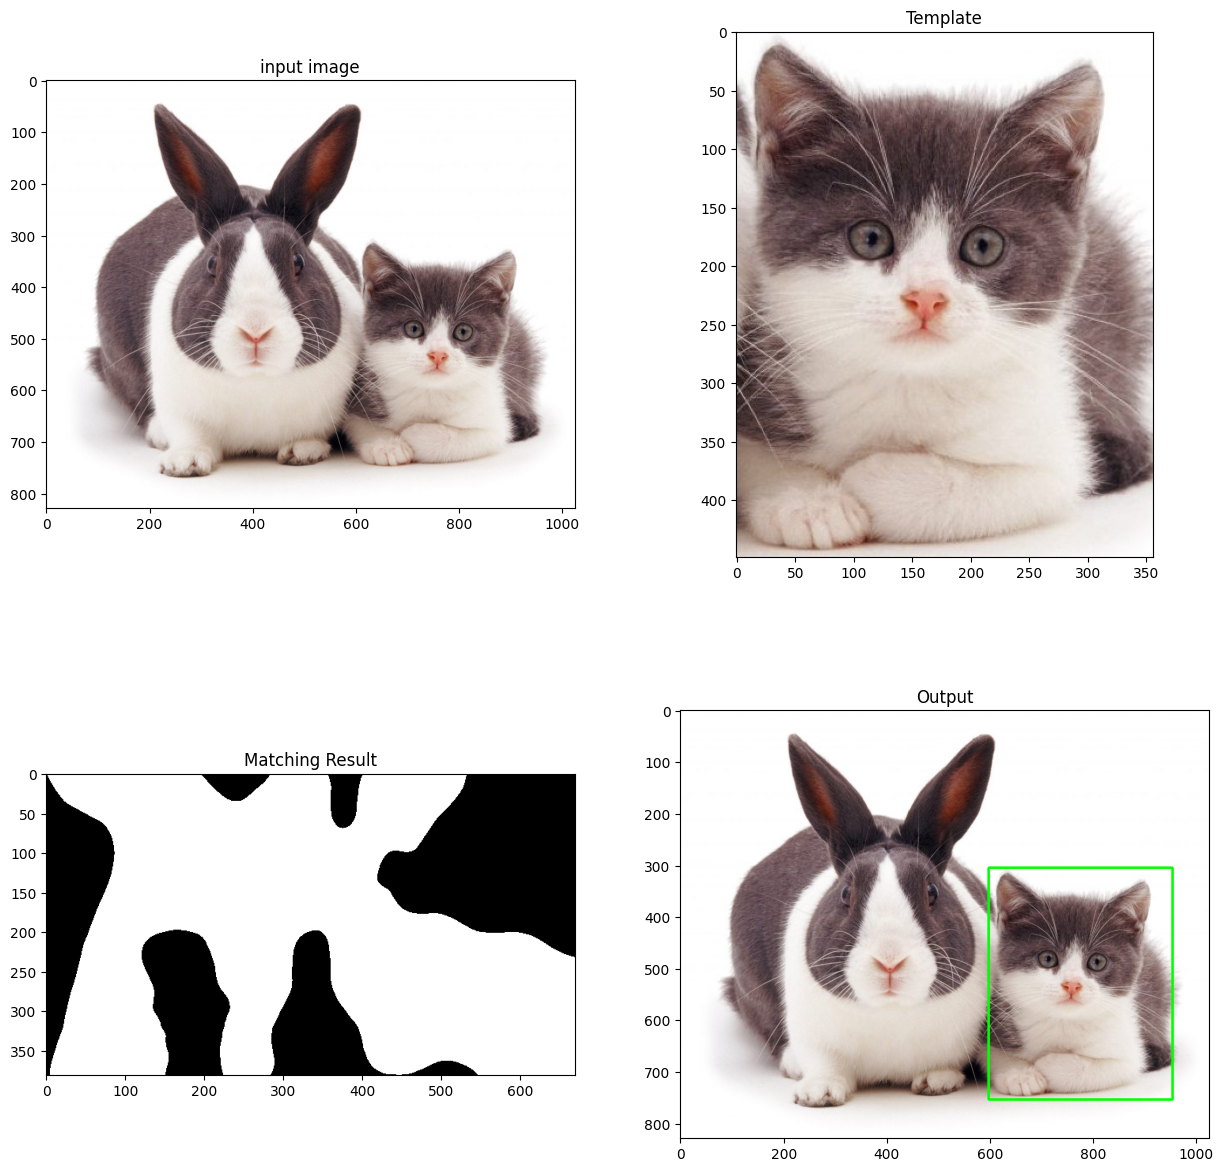

In [8]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg")
tempt = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
tempt_gray = cv2.cvtColor(tempt, cv2.COLOR_BGR2GRAY)

ccoeff_match = cv2.matchTemplate(image, tempt, cv2.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(ccoeff_match)

top_left = max_loc
bottom_right = (top_left[0] + tempt.shape[1], top_left[1] + tempt.shape[0])

image_with_box = image.copy()
cv2.rectangle(image_with_box, top_left, bottom_right, (0, 255, 0), 3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("input image")
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(tempt, cv2.COLOR_BGR2RGB))
plt.title("Template")
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(ccoeff_match, cv2.COLOR_BGR2RGB))
plt.title("Matching Result")
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.title("Output")
plt.show()


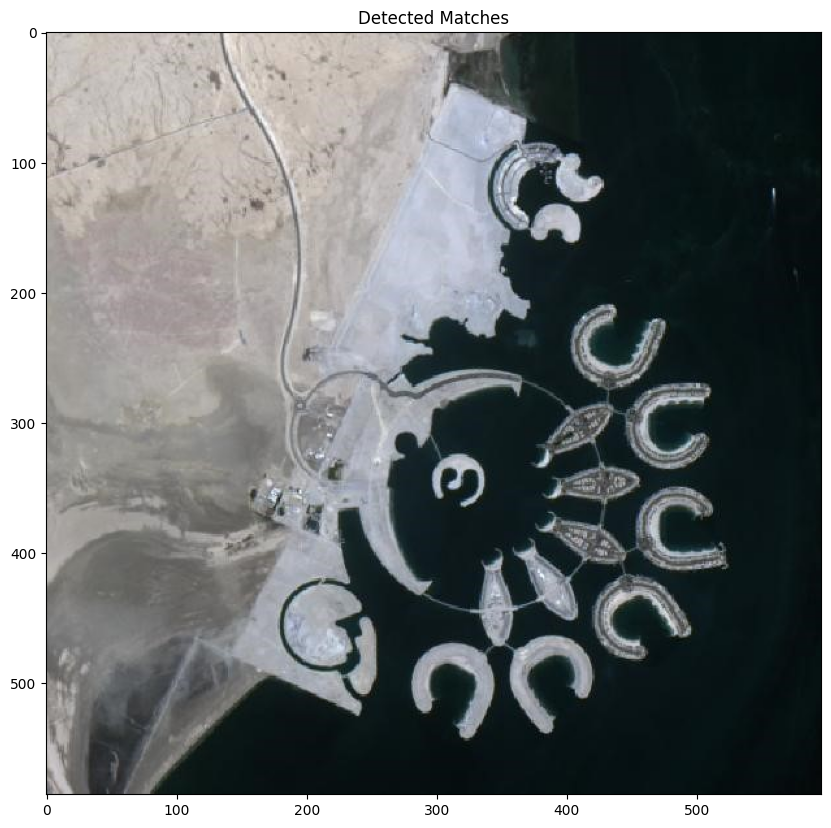

In [15]:
def template_matching_ssd(image, template, threshold):
    h, w = template.shape
    img_h, img_w = image.shape
    matches = []

    # Iterasi melalui semua piksel yang memungkinkan di gambar
    for y in range(img_h - h + 1):
        for x in range(img_w - w + 1):
            # Memotong bagian gambar sesuai ukuran template
            sub_image = image[y:y+h, x:x+w].astype(np.float32)
            template_float = template.astype(np.float32)

            # Menghitung SSD antara template dan bagian gambar
            ssd = np.sum((sub_image - template_float) ** 2)

            # Jika SSD kurang dari threshold, simpan lokasi tersebut sebagai match
            if ssd < threshold:
                matches.append((x, y))

    return matches

# Membaca gambar utama dan template
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg")
template = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg")

# Konversi gambar utama dan template ke skala abu-abu
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Mengatur threshold yang lebih rendah untuk mengurangi pendeteksian yang tidak perlu
threshold = 2e2  # Sesuaikan threshold sesuai kebutuhan

# Melakukan template matching
matches = template_matching_ssd(image_gray, template_gray, threshold)

# Menampilkan hasil dengan gambar berwarna
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Matches")
for (x, y) in matches:
    # Menggambar kotak pembatas di lokasi yang cocok
    rect = plt.Rectangle((x, y), template_gray.shape[1], template_gray.shape[0], edgecolor='r', facecolor='none', linewidth=2)
    plt.gca().add_patch(rect)
plt.show()

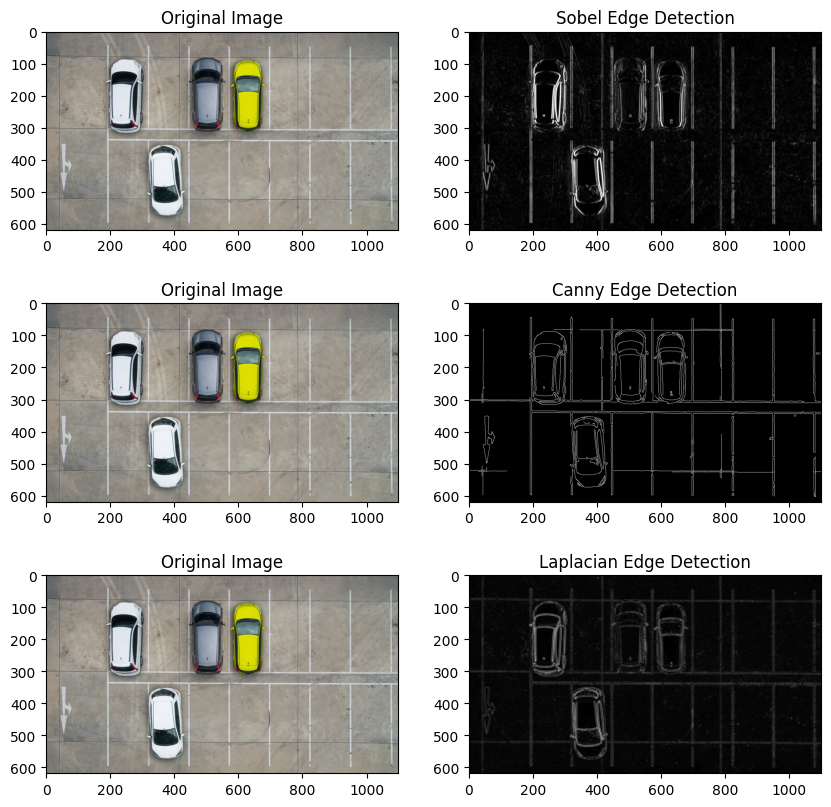

In [19]:
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

edges_sobel = cv2.Sobel(blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
edges_canny = cv2.Canny(blurred, threshold1=50, threshold2=150)
edges_laplacian = cv2.Laplacian(blurred, ddepth=cv2.CV_64F)

edges_sobel = cv2.convertScaleAbs(edges_sobel)
edges_laplacian = cv2.convertScaleAbs(edges_laplacian)

plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(3, 2, 2)
plt.imshow(edges_sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(3, 2, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(3, 2, 6)
plt.imshow(edges_laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.show()